In [2]:
import pandas as pd

df = pd.read_csv('data/Fish.csv')

In [3]:
cond = df['Species'].isin(['Bream', 'Smelt'])
lw_df = df.loc[cond, ['Length2', 'Weight']]
fish_data = lw_df.values.tolist()

In [4]:
fish_target = [1] * 35 + [0] * 14

In [5]:
from sklearn.neighbors import KNeighborsClassifier

In [6]:
kn = KNeighborsClassifier()

In [7]:
train_input = fish_data[:35]
train_target = fish_target[:35]

test_input = fish_data[35:]
test_target = fish_target[35:]

In [8]:
kn.fit(train_input, train_target)

KNeighborsClassifier()

In [14]:
kn.score(test_input, test_target)
# 데이터가 섞이지 않았기 때문에
# 위에서부터 35개가 모두 1인 도미만 뽑힘

0.0

In [15]:
import numpy as np

In [16]:
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

input_arr.shape

(49, 2)

In [18]:
np.random.seed(42)
index = np.arange(49)
np.random.shuffle(index)
print(index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [85]:
input_arr[[1, 3]]

array([[ 26.3, 290. ],
       [ 29. , 363. ]])

In [86]:
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]
# train_input

In [87]:
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

In [88]:
import matplotlib.pyplot as plt

In [89]:
train_input[:, 0]

array([32. , 12.4, 14.3, 12.2, 33. , 36. , 35. , 35. , 38.5, 33.5, 31.5,
       29. , 41. , 30. , 29. , 29.7, 11.3, 11.8, 13. , 32. , 30.7, 33. ,
       35. , 41. , 38.5, 25.4, 12. , 39.5, 29.7, 37. , 31. , 10.5, 26.3,
       34. , 26.5])

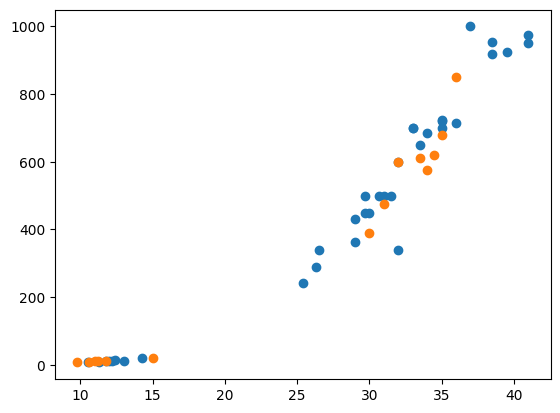

In [90]:
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(test_input[:, 0], test_input[:, 1])

In [91]:
kn.fit(train_input, train_target)

KNeighborsClassifier()

In [92]:
kn.score(test_input, test_target)

1.0

In [93]:
kn.predict(test_input)

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

## iris

In [106]:
# setosa, versicolor 종 분류
# petal_length, petal_width 특성 기준으로

import seaborn as sns
iris = sns.load_dataset('iris')

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [95]:
cond = iris['species'].isin(['setosa', 'versicolor'])
iris_df = iris.loc[cond, ['petal_length', 'petal_width']]
# iris_df

iris_data = iris_df.values

In [96]:
setosa_count = iris.loc[iris['species'] == 'setosa'].shape[0]
versicolor_count = iris.loc[iris['species'] == 'versicolor'].shape[0]

In [97]:
import numpy as np
iris_target = np.array([1] * setosa_count + [0] * versicolor_count)

In [98]:
import random

index = list(range(setosa_count + versicolor_count))
random.shuffle(index)
# index

In [99]:
train_input = iris_data[index[:70]]
train_target = iris_target[index[:70]]

In [100]:
test_input = iris_data[index[70:]]
test_target = iris_target[index[70:]]

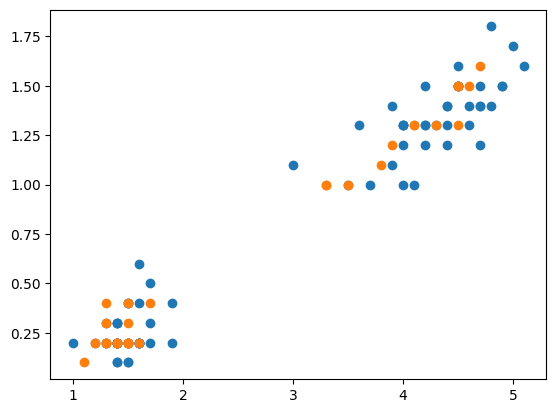

In [101]:
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(test_input[:, 0], test_input[:, 1])

In [102]:
from sklearn.neighbors import KNeighborsClassifier

In [103]:
kn = KNeighborsClassifier()

In [104]:
kn.fit(train_input, train_target)

KNeighborsClassifier()

In [105]:
kn.score(test_input, test_target)

1.0